In [1]:
import random
import math
def throw():
    r = random.random()
    angle = random.random() * 2 * math.pi
    return math.cos(angle) * r, math.sin(angle) * r

def dist(a, b):
    return math.hypot(a[0]-b[0], a[1]-b[1])

In [7]:
import itertools
def is_close(l):
    if len(l) == 0:
        return False
    for a, b in itertools.product(l, repeat=2):
        if a == b:
            continue
        if dist(a, b) > 1:
            return True
    return False
    
def play_game():
    throws = [throw(), throw()]
    while not is_close(throws):
        throws.append(throw())
    return len(throws) - 1


In [8]:
games = [play_game() for x in range(1000000)]

In [9]:
import numpy as np
np.max(games), np.mean(games)

(24, 3.1796959999999999)

In [10]:
twos = len(list(filter(lambda x: x > 1, games)))
twos/len(games)

0.777343

In [67]:
def point_gen():
    for r in np.linspace(0,1,2):
        for theta in np.linspace(0,2 * math.pi, 7):
            yield math.cos(theta) * r, math.sin(theta) * r

In [68]:
best_path = []
def dfs_helper(path):
    if is_close(path):
        return
    if len(path) > len(best_path):
        best_path.clear()
        best_path.extend(path)
    for p in point_gen():
        path.append(p)
        dfs_helper(path)
        path.pop()
dfs_helper([])

In [69]:
best_path

[(0.0, 0.0),
 (1.0, 0.0),
 (0.50000000000000011, 0.8660254037844386),
 (-0.49999999999999978, 0.86602540378443871),
 (-1.0, 1.2246467991473532e-16),
 (-0.50000000000000044, -0.86602540378443837),
 (0.49999999999999933, -0.86602540378443904)]

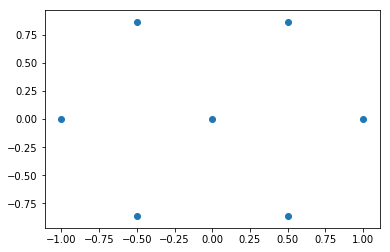

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([x[0] for x in best_path], [x[1] for x in best_path])

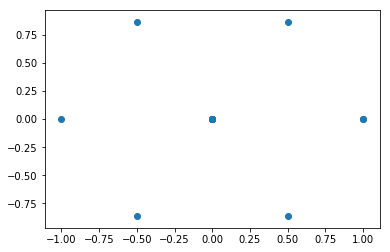

In [64]:
plt.scatter([x[0] for x in ps], [x[1] for x in ps])

In [65]:
dist((0.50000000000000011, 0.8660254037844386), (-0.49999999999999978, 0.86602540378443871))

0.9999999999999999